In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.decomposition import PCA
import pylab as pl
from matplotlib import collections  as mc
from mpl_toolkits.mplot3d import Axes3D
import pickle
import codecs
%matplotlib inline
plt.rcParams['figure.figsize'] = (60.0, 30.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
df = pd.read_csv("../common/dataset.csv")
df_t = df[['DEFAULT PAYMENT JAN','CUST_COD']]

df = df.set_index(['CUST_COD'], drop=True)
df = df.drop("DEFAULT PAYMENT JAN",1)
df.index.name = None

df_t = df_t.set_index(['CUST_COD'], drop=True)
df_t.index.name = None

df_real = df.copy()

In [4]:
print df_real.shape
#df_real.head(30)

(26884, 23)


In [5]:
print df_t.shape
df_t.head()

(26884, 1)


,DEFAULT PAYMENT JAN
53613503,0
35524089,1
58777007,0
26913418,0
41993633,1


test_1 = df.head(24)
fig, axarr = plt.subplots(8, 3,figsize=(90, 150))
fig.suptitle("TEST", fontsize=40)

x = np.arange(6)
for index,b in enumerate(test_1.iterrows()):
    bill_amt = []
    i = index%8
    j = index%3
    bill_amt.append(b[1][11])
    bill_amt.append(b[1][12])
    bill_amt.append(b[1][13])
    bill_amt.append(b[1][14])
    bill_amt.append(b[1][15])
    bill_amt.append(b[1][16])
    
    axarr[i,j].scatter(x,bill_amt)
    axarr[i,j].plot(x,bill_amt)
    axarr[i,j].set_title(str(index), size=30)
    
for index,p in enumerate(test_1.iterrows()):
    pay_amt = []
    i = index%8
    j = index%3
    pay_amt.append(p[1][17])
    pay_amt.append(p[1][18])
    pay_amt.append(p[1][19])
    pay_amt.append(p[1][20])
    pay_amt.append(p[1][21])
    pay_amt.append(p[1][22])
    
    axarr[i,j].scatter(x,pay_amt)
    axarr[i,j].plot(x,pay_amt)

plt.show()

In [219]:
SAMPLE = 12696362
idx = 15
df = df_real.iloc[[idx]]
#df = df_real.copy()
dt = df_t.copy().iloc[[idx]]
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()
df6 = df.copy()
colors = {0:'r', 1:'b'}

In [220]:
df1["SHOP_JUL"] = df.apply(lambda row : row["BILL_AMT_JUL"] - 0 - row["PAY_AMT_JUL"], axis=1)
df1["SHOP_AUG"] = df.apply(lambda row : row["BILL_AMT_AUG"] - row["BILL_AMT_JUL"] + row["PAY_AMT_AUG"], axis=1)
df1["SHOP_SEP"] = df.apply(lambda row : row["BILL_AMT_SEP"] - row["BILL_AMT_AUG"] + row["PAY_AMT_SEP"], axis=1)
df1["SHOP_OCT"] = df.apply(lambda row : row["BILL_AMT_OCT"] - row["BILL_AMT_SEP"] + row["PAY_AMT_OCT"], axis=1)
df1["SHOP_NOV"] = df.apply(lambda row : row["BILL_AMT_NOV"] - row["BILL_AMT_OCT"] + row["PAY_AMT_NOV"], axis=1)
df1["SHOP_DEC"] = df.apply(lambda row : row["BILL_AMT_DEC"] - row["BILL_AMT_NOV"] + row["PAY_AMT_DEC"], axis=1)

In [221]:
#this columns contain for each month the difference between how much the person has spent and how much has repaid
# USCITE AL NETTO DEI REPAY
df2["SHOP_JUL_NET"] = df1.apply(lambda row : row["SHOP_JUL"] - row["PAY_AMT_JUL"], axis=1)
df2["SHOP_AUG_NET"] = df1.apply(lambda row : row["SHOP_AUG"] - row["PAY_AMT_AUG"], axis=1)
df2["SHOP_SEP_NET"] = df1.apply(lambda row : row["SHOP_SEP"] - row["PAY_AMT_SEP"], axis=1)
df2["SHOP_OCT_NET"] = df1.apply(lambda row : row["SHOP_OCT"] - row["PAY_AMT_OCT"], axis=1)
df2["SHOP_NOV_NET"] = df1.apply(lambda row : row["SHOP_NOV"] - row["PAY_AMT_NOV"], axis=1)
df2["SHOP_DEC_NET"] = df1.apply(lambda row : row["SHOP_DEC"] - row["PAY_AMT_DEC"], axis=1)

In [222]:
# NOW WE CAN ALSO DIVIDE EACH NET VALUE FOR THE LIMIT BALL !

df3["SHOP_JUL_NET"] = df2.apply(lambda row : ( row["SHOP_JUL_NET"] ) / row["LIMIT_BAL"], axis=1)
df3["SHOP_AUG_NET"] = df2.apply(lambda row : ( row["SHOP_AUG_NET"] ) / row["LIMIT_BAL"], axis=1)
df3["SHOP_SEP_NET"] = df2.apply(lambda row : ( row["SHOP_SEP_NET"] ) / row["LIMIT_BAL"], axis=1)
df3["SHOP_OCT_NET"] = df2.apply(lambda row : ( row["SHOP_OCT_NET"] ) / row["LIMIT_BAL"], axis=1)
df3["SHOP_NOV_NET"] = df2.apply(lambda row : ( row["SHOP_NOV_NET"] ) / row["LIMIT_BAL"], axis=1)
df3["SHOP_DEC_NET"] = df2.apply(lambda row : ( row["SHOP_DEC_NET"] ) / row["LIMIT_BAL"], axis=1)

In [223]:
df4["CUM_PAY_JUL"] = df.apply(lambda row : row["PAY_AMT_JUL"], axis=1)
df4["CUM_PAY_AUG"] = df.apply(lambda row : row["PAY_AMT_JUL"] + row["PAY_AMT_AUG"], axis=1)
df4["CUM_PAY_SEP"] = df.apply(lambda row : row["PAY_AMT_JUL"] + row["PAY_AMT_AUG"] + row["PAY_AMT_SEP"], axis=1)
df4["CUM_PAY_OCT"] = df.apply(lambda row : row["PAY_AMT_JUL"] + row["PAY_AMT_AUG"] + row["PAY_AMT_SEP"] + row["PAY_AMT_OCT"], axis=1)
df4["CUM_PAY_NOV"] = df.apply(lambda row : row["PAY_AMT_JUL"] + row["PAY_AMT_AUG"] + row["PAY_AMT_SEP"] + row["PAY_AMT_OCT"] + row["PAY_AMT_NOV"], axis=1)
df4["CUM_PAY_DEC"] = df.apply(lambda row : row["PAY_AMT_JUL"] + row["PAY_AMT_AUG"] + row["PAY_AMT_SEP"] + row["PAY_AMT_OCT"] + row["PAY_AMT_NOV"] + row["PAY_AMT_DEC"], axis=1)

In [224]:
df5["CUM_SHOP_JUL"] = df1.apply(lambda row : row["SHOP_JUL"], axis=1)
df5["CUM_SHOP_AUG"] = df1.apply(lambda row : row["SHOP_JUL"] + row["SHOP_AUG"], axis=1)
df5["CUM_SHOP_SEP"] = df1.apply(lambda row : row["SHOP_JUL"] + row["SHOP_AUG"] + row["SHOP_SEP"], axis=1)
df5["CUM_SHOP_OCT"] = df1.apply(lambda row : row["SHOP_JUL"] + row["SHOP_AUG"] + row["SHOP_SEP"] + row["SHOP_OCT"], axis=1)
df5["CUM_SHOP_NOV"] = df1.apply(lambda row : row["SHOP_JUL"] + row["SHOP_AUG"] + row["SHOP_SEP"] + row["SHOP_OCT"] + row["SHOP_NOV"], axis=1)
df5["CUM_SHOP_DEC"] = df1.apply(lambda row : row["SHOP_JUL"] + row["SHOP_AUG"] + row["SHOP_SEP"] + row["SHOP_OCT"] + row["SHOP_NOV"] + row["SHOP_DEC"], axis=1)

In [225]:
df6["CUM_SHOP_JUL"] = df2.apply(lambda row : row["SHOP_JUL_NET"], axis=1)
df6["CUM_SHOP_AUG"] = df2.apply(lambda row : row["SHOP_JUL_NET"] + row["SHOP_AUG_NET"], axis=1)
df6["CUM_SHOP_SEP"] = df2.apply(lambda row : row["SHOP_JUL_NET"] + row["SHOP_AUG_NET"] + row["SHOP_SEP_NET"], axis=1)
df6["CUM_SHOP_OCT"] = df2.apply(lambda row : row["SHOP_JUL_NET"] + row["SHOP_AUG_NET"] + row["SHOP_SEP_NET"] + row["SHOP_OCT_NET"], axis=1)
df6["CUM_SHOP_NOV"] = df2.apply(lambda row : row["SHOP_JUL_NET"] + row["SHOP_AUG_NET"] + row["SHOP_SEP_NET"] + row["SHOP_OCT_NET"] + row["SHOP_NOV_NET"], axis=1)
df6["CUM_SHOP_DEC"] = df2.apply(lambda row : row["SHOP_JUL_NET"] + row["SHOP_AUG_NET"] + row["SHOP_SEP_NET"] + row["SHOP_OCT_NET"] + row["SHOP_NOV_NET"] + row["SHOP_DEC_NET"], axis=1)

In [226]:
df1 = df1[df1.columns[-6:]]
df2 = df2[df2.columns[-6:]]
df3 = df3[df3.columns[-6:]]
df4 = df4[df4.columns[-6:]]
df5 = df5[df5.columns[-6:]]
df6 = df6[df6.columns[-6:]]
df1["TARGET"] = dt["DEFAULT PAYMENT JAN"].values
df2["TARGET"] = dt["DEFAULT PAYMENT JAN"].values
df3["TARGET"] = dt["DEFAULT PAYMENT JAN"].values
df4["TARGET"] = dt["DEFAULT PAYMENT JAN"].values
df5["TARGET"] = dt["DEFAULT PAYMENT JAN"].values
df6["TARGET"] = dt["DEFAULT PAYMENT JAN"].values
df1["TARGET"] = df1["TARGET"].apply(lambda x: colors[x])
df2["TARGET"] = df2["TARGET"].apply(lambda x: colors[x])
df3["TARGET"] = df3["TARGET"].apply(lambda x: colors[x])
df4["TARGET"] = df4["TARGET"].apply(lambda x: colors[x])
df5["TARGET"] = df5["TARGET"].apply(lambda x: colors[x])
df6["TARGET"] = df6["TARGET"].apply(lambda x: colors[x])

In [227]:
print df1.shape
df1.round(3).head(4)

(1, 7)


,SHOP_JUL,SHOP_AUG,SHOP_SEP,SHOP_OCT,SHOP_NOV,SHOP_DEC,TARGET
19419760,1824.443,34.882,28.412,46.509,2145.983,54.559,r


In [228]:
# + denaro in entrata al customer, - denaro in uscita al customer
print df2.shape
df2.round(3).head(4)

(1, 7)


,SHOP_JUL_NET,SHOP_AUG_NET,SHOP_SEP_NET,SHOP_OCT_NET,SHOP_NOV_NET,SHOP_DEC_NET,TARGET
19419760,1749.909,-54.559,-105.749,46.509,287.314,54.38,r


In [229]:
print df3.shape
df3.round(3).head(4)

(1, 7)


,SHOP_JUL_NET,SHOP_AUG_NET,SHOP_SEP_NET,SHOP_OCT_NET,SHOP_NOV_NET,SHOP_DEC_NET,TARGET
19419760,0.838,-0.026,-0.051,0.022,0.138,0.026,r


In [230]:
print df4.shape
df4.round(3).head(4)

(1, 7)


,CUM_PAY_JUL,CUM_PAY_AUG,CUM_PAY_SEP,CUM_PAY_OCT,CUM_PAY_NOV,CUM_PAY_DEC,TARGET
19419760,74.534,163.975,298.136,298.136,2156.805,2156.984,r


In [231]:
print df5.shape
df5.round(3).head(4)

(1, 7)


,CUM_SHOP_JUL,CUM_SHOP_AUG,CUM_SHOP_SEP,CUM_SHOP_OCT,CUM_SHOP_NOV,CUM_SHOP_DEC,TARGET
19419760,1824.443,1859.325,1887.738,1934.247,4080.23,4134.789,r


In [232]:
print df6.shape
df6.round(3).head(4)

(1, 7)


,CUM_SHOP_JUL,CUM_SHOP_AUG,CUM_SHOP_SEP,CUM_SHOP_OCT,CUM_SHOP_NOV,CUM_SHOP_DEC,TARGET
19419760,1749.909,1695.35,1589.602,1636.111,1923.424,1977.804,r


In [ ]:
df1_save = df1[df1.columns[:6]]
df2_save = df2[df2.columns[:6]]
df3_save = df3[df3.columns[:6]]
df4_save = df4[df4.columns[:6]]
df5_save = df5[df5.columns[:6]]
df6_save = df6[df6.columns[:6]]
df1_save.to_csv("../common/albertom/new_data/df1.csv", index = True)
df2_save.to_csv("../common/albertom/new_data/df2.csv", index = True)
df3_save.to_csv("../common/albertom/new_data/df3.csv", index = True)
df4_save.to_csv("../common/albertom/new_data/df4.csv", index = True)
df5_save.to_csv("../common/albertom/new_data/df5.csv", index = True)
df6_save.to_csv("../common/albertom/new_data/df6.csv", index = True)

x = np.arange(6)

bill_amt = []
bill_amt.append(df.loc[[SAMPLE]].iloc[:, 16].values[0])
bill_amt.append(df.loc[[SAMPLE]].iloc[:, 15].values[0])
bill_amt.append(df.loc[[SAMPLE]].iloc[:, 14].values[0])
bill_amt.append(df.loc[[SAMPLE]].iloc[:, 13].values[0])
bill_amt.append(df.loc[[SAMPLE]].iloc[:, 12].values[0])
bill_amt.append(df.loc[[SAMPLE]].iloc[:, 11].values[0])
plt.scatter(x, bill_amt)
plt.plot(x, bill_amt, label='BILL_AMT')
    
pay_amt = []
pay_amt.append(df.loc[[SAMPLE]].iloc[:, 22].values[0])
pay_amt.append(df.loc[[SAMPLE]].iloc[:, 21].values[0])
pay_amt.append(df.loc[[SAMPLE]].iloc[:, 20].values[0])
pay_amt.append(df.loc[[SAMPLE]].iloc[:, 19].values[0])
pay_amt.append(df.loc[[SAMPLE]].iloc[:, 18].values[0])
pay_amt.append(df.loc[[SAMPLE]].iloc[:, 17].values[0])
plt.scatter(x, pay_amt)
plt.plot(x, pay_amt, label='PAY_AMT') 

pl.xlabel("MONTH")
pl.legend(loc='upper left')

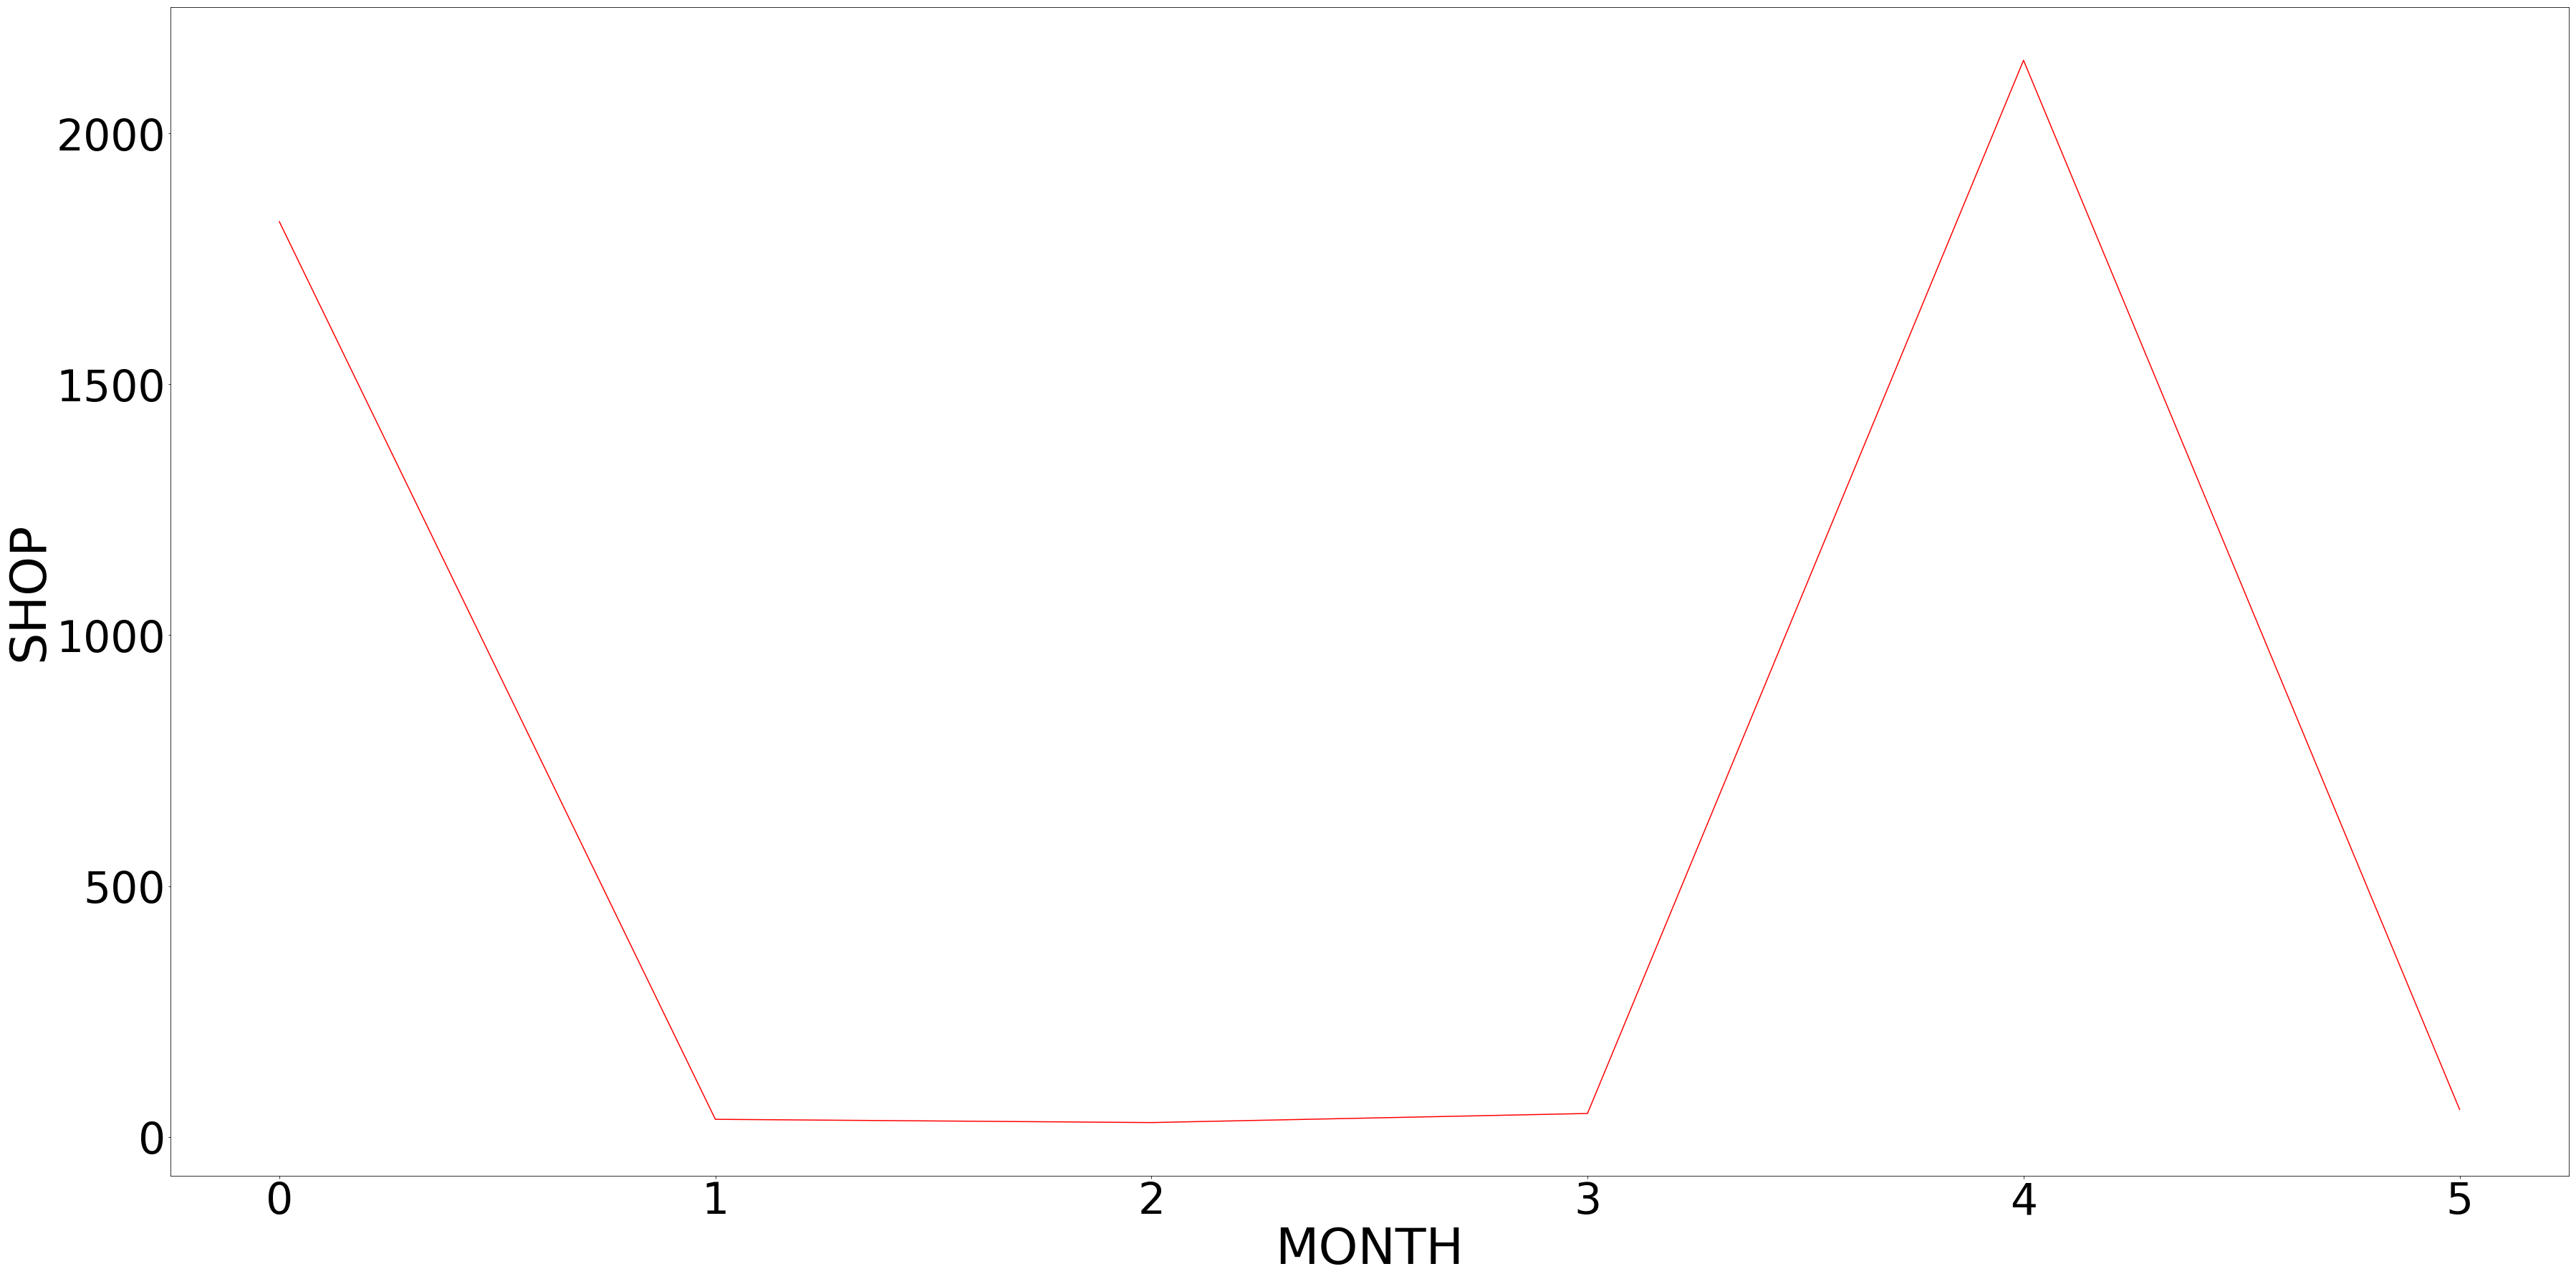

In [233]:
# NON MOLTO SENSATO, MEGLIO CONSIDERARE IL CUMULATED SHOP O ANCORA MEGLIO IL CUMULATED NET SHOP
x = np.arange(6)
for SAMPLE in df1.index:
    outgoing_amt = []
    outgoing_amt.append(df1.loc[[SAMPLE]].iloc[:, 0].values[0])
    outgoing_amt.append(df1.loc[[SAMPLE]].iloc[:, 1].values[0])
    outgoing_amt.append(df1.loc[[SAMPLE]].iloc[:, 2].values[0])
    outgoing_amt.append(df1.loc[[SAMPLE]].iloc[:, 3].values[0])
    outgoing_amt.append(df1.loc[[SAMPLE]].iloc[:, 4].values[0])
    outgoing_amt.append(df1.loc[[SAMPLE]].iloc[:, 5].values[0])
    #plt.scatter(x, outgoing_amt)
    plt.plot(x, outgoing_amt, c=df1.loc[[SAMPLE]].iloc[:, 6].values[0], alpha=1)
    plt.tick_params(labelsize=60)
    plt.xlabel("MONTH", size=70)
    plt.ylabel("SHOP", size=70)

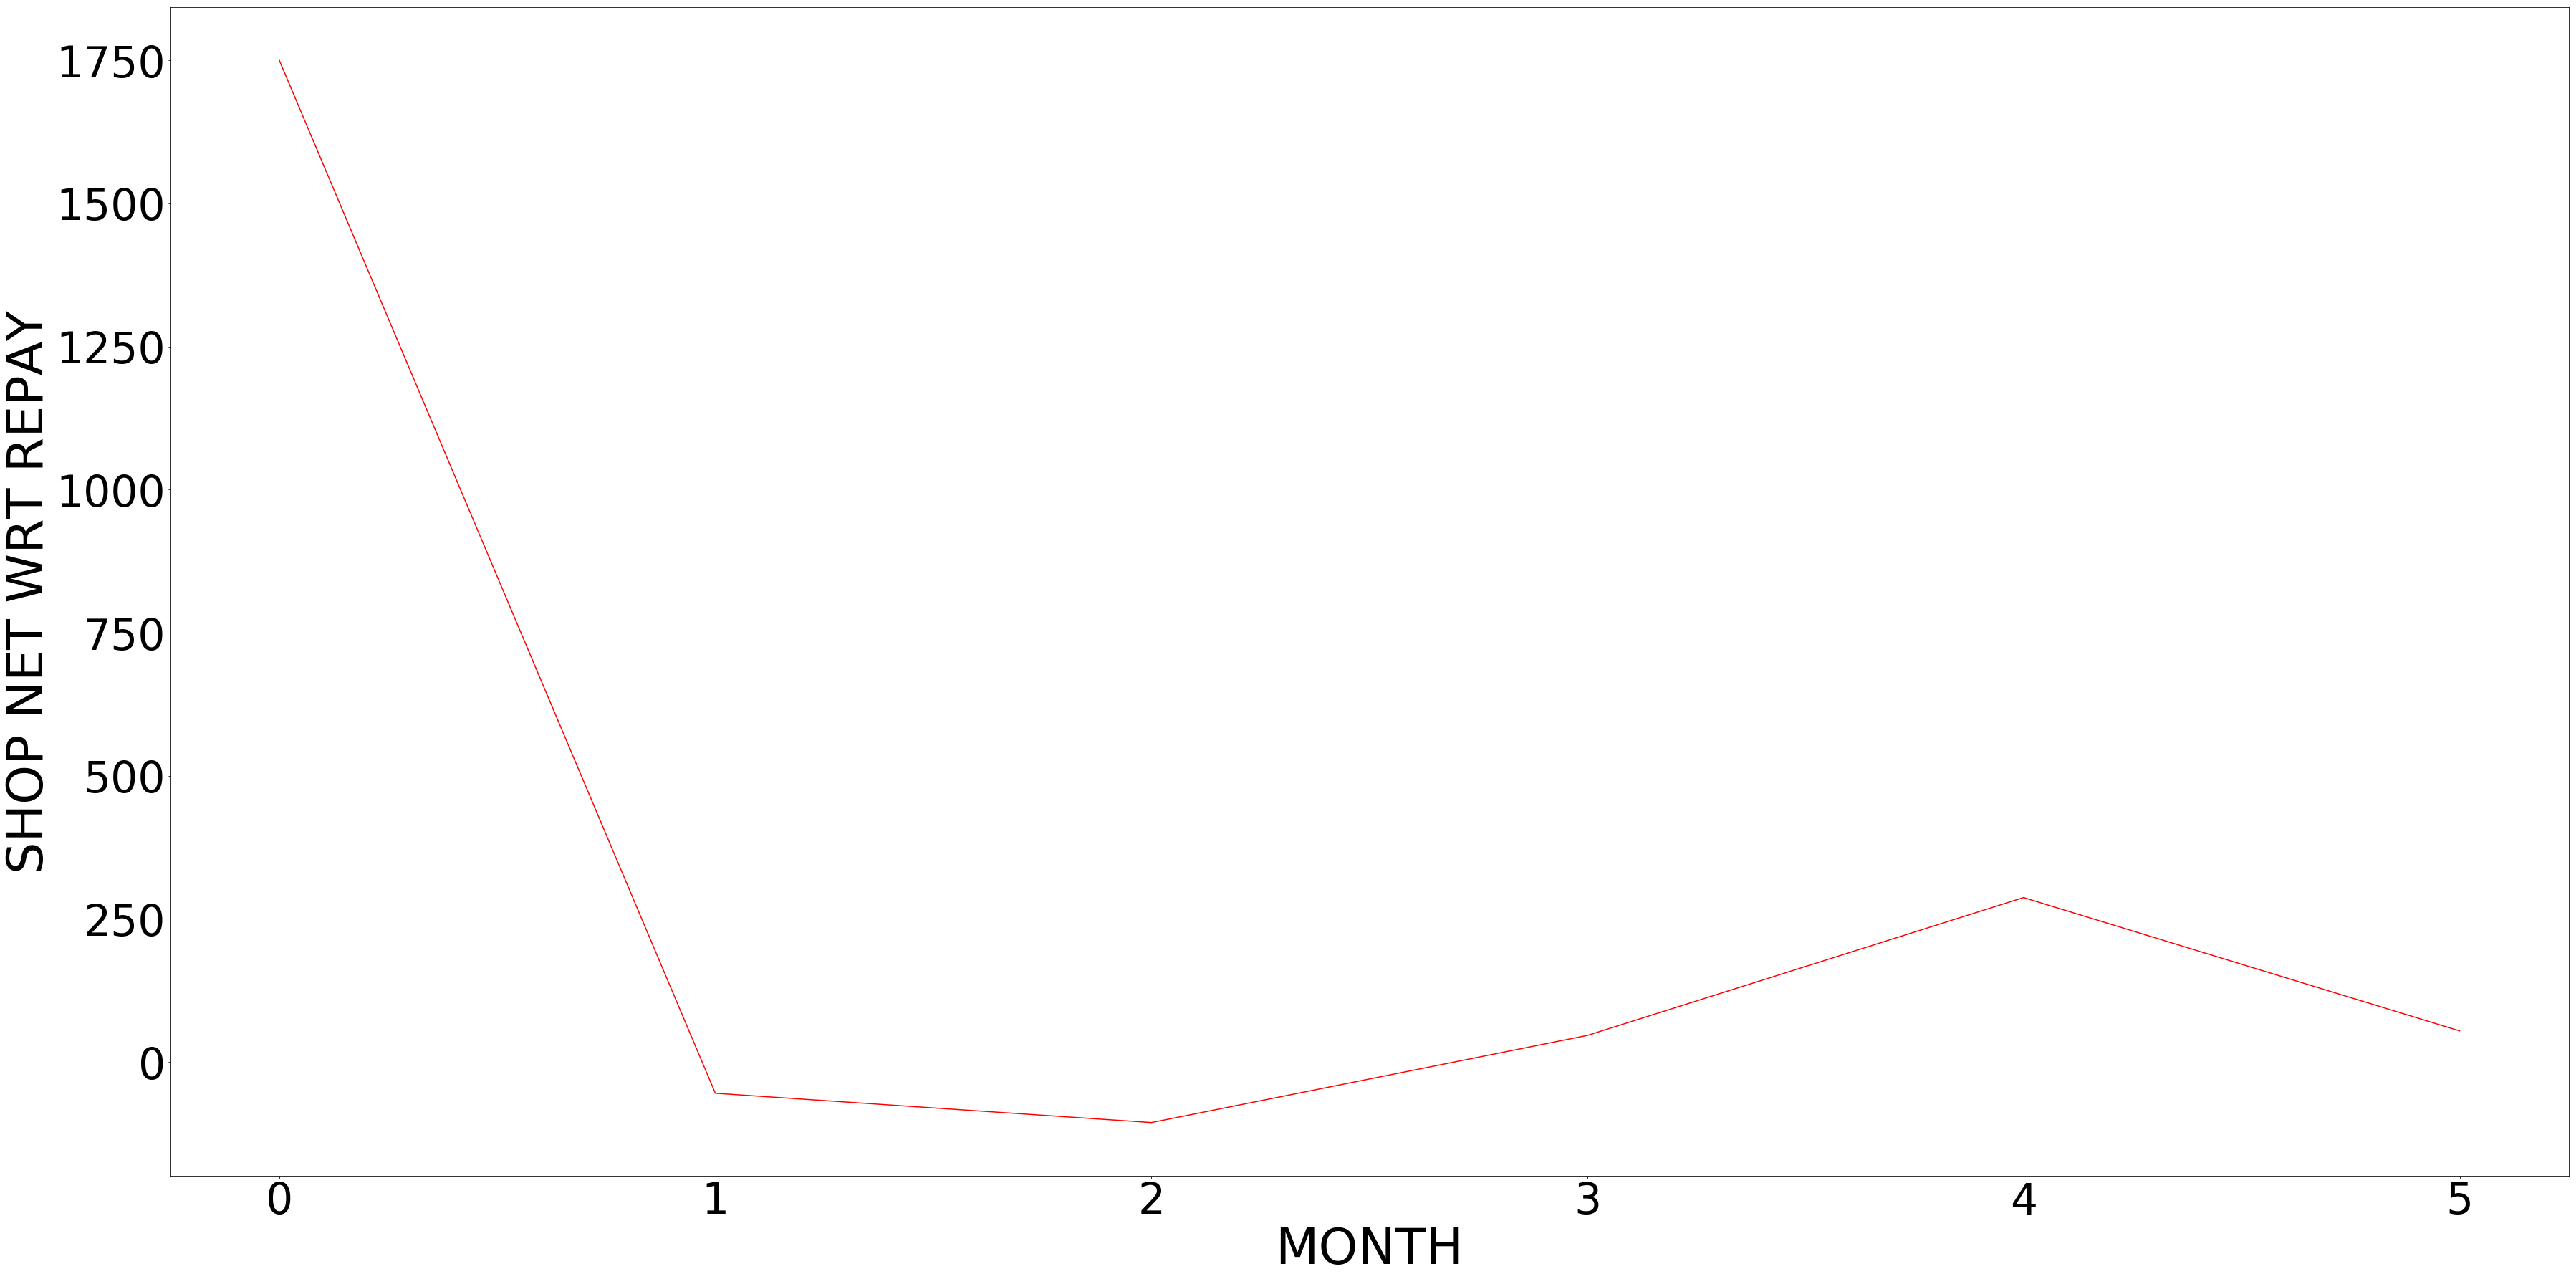

In [234]:
for SAMPLE in df2.index:
    outgoing_amt_net = []
    outgoing_amt_net.append(df2.loc[[SAMPLE]].iloc[:, 0].values[0])
    outgoing_amt_net.append(df2.loc[[SAMPLE]].iloc[:, 1].values[0])
    outgoing_amt_net.append(df2.loc[[SAMPLE]].iloc[:, 2].values[0])
    outgoing_amt_net.append(df2.loc[[SAMPLE]].iloc[:, 3].values[0])
    outgoing_amt_net.append(df2.loc[[SAMPLE]].iloc[:, 4].values[0])
    outgoing_amt_net.append(df2.loc[[SAMPLE]].iloc[:, 5].values[0])
    #plt.scatter(x, outgoing_amt_net)
    plt.plot(x, outgoing_amt_net, c=df2.loc[[SAMPLE]].iloc[:, 6].values[0], alpha=1)
    plt.tick_params(labelsize=60)
    plt.xlabel("MONTH", size=70)
    plt.ylabel("SHOP NET WRT REPAY", size=70)

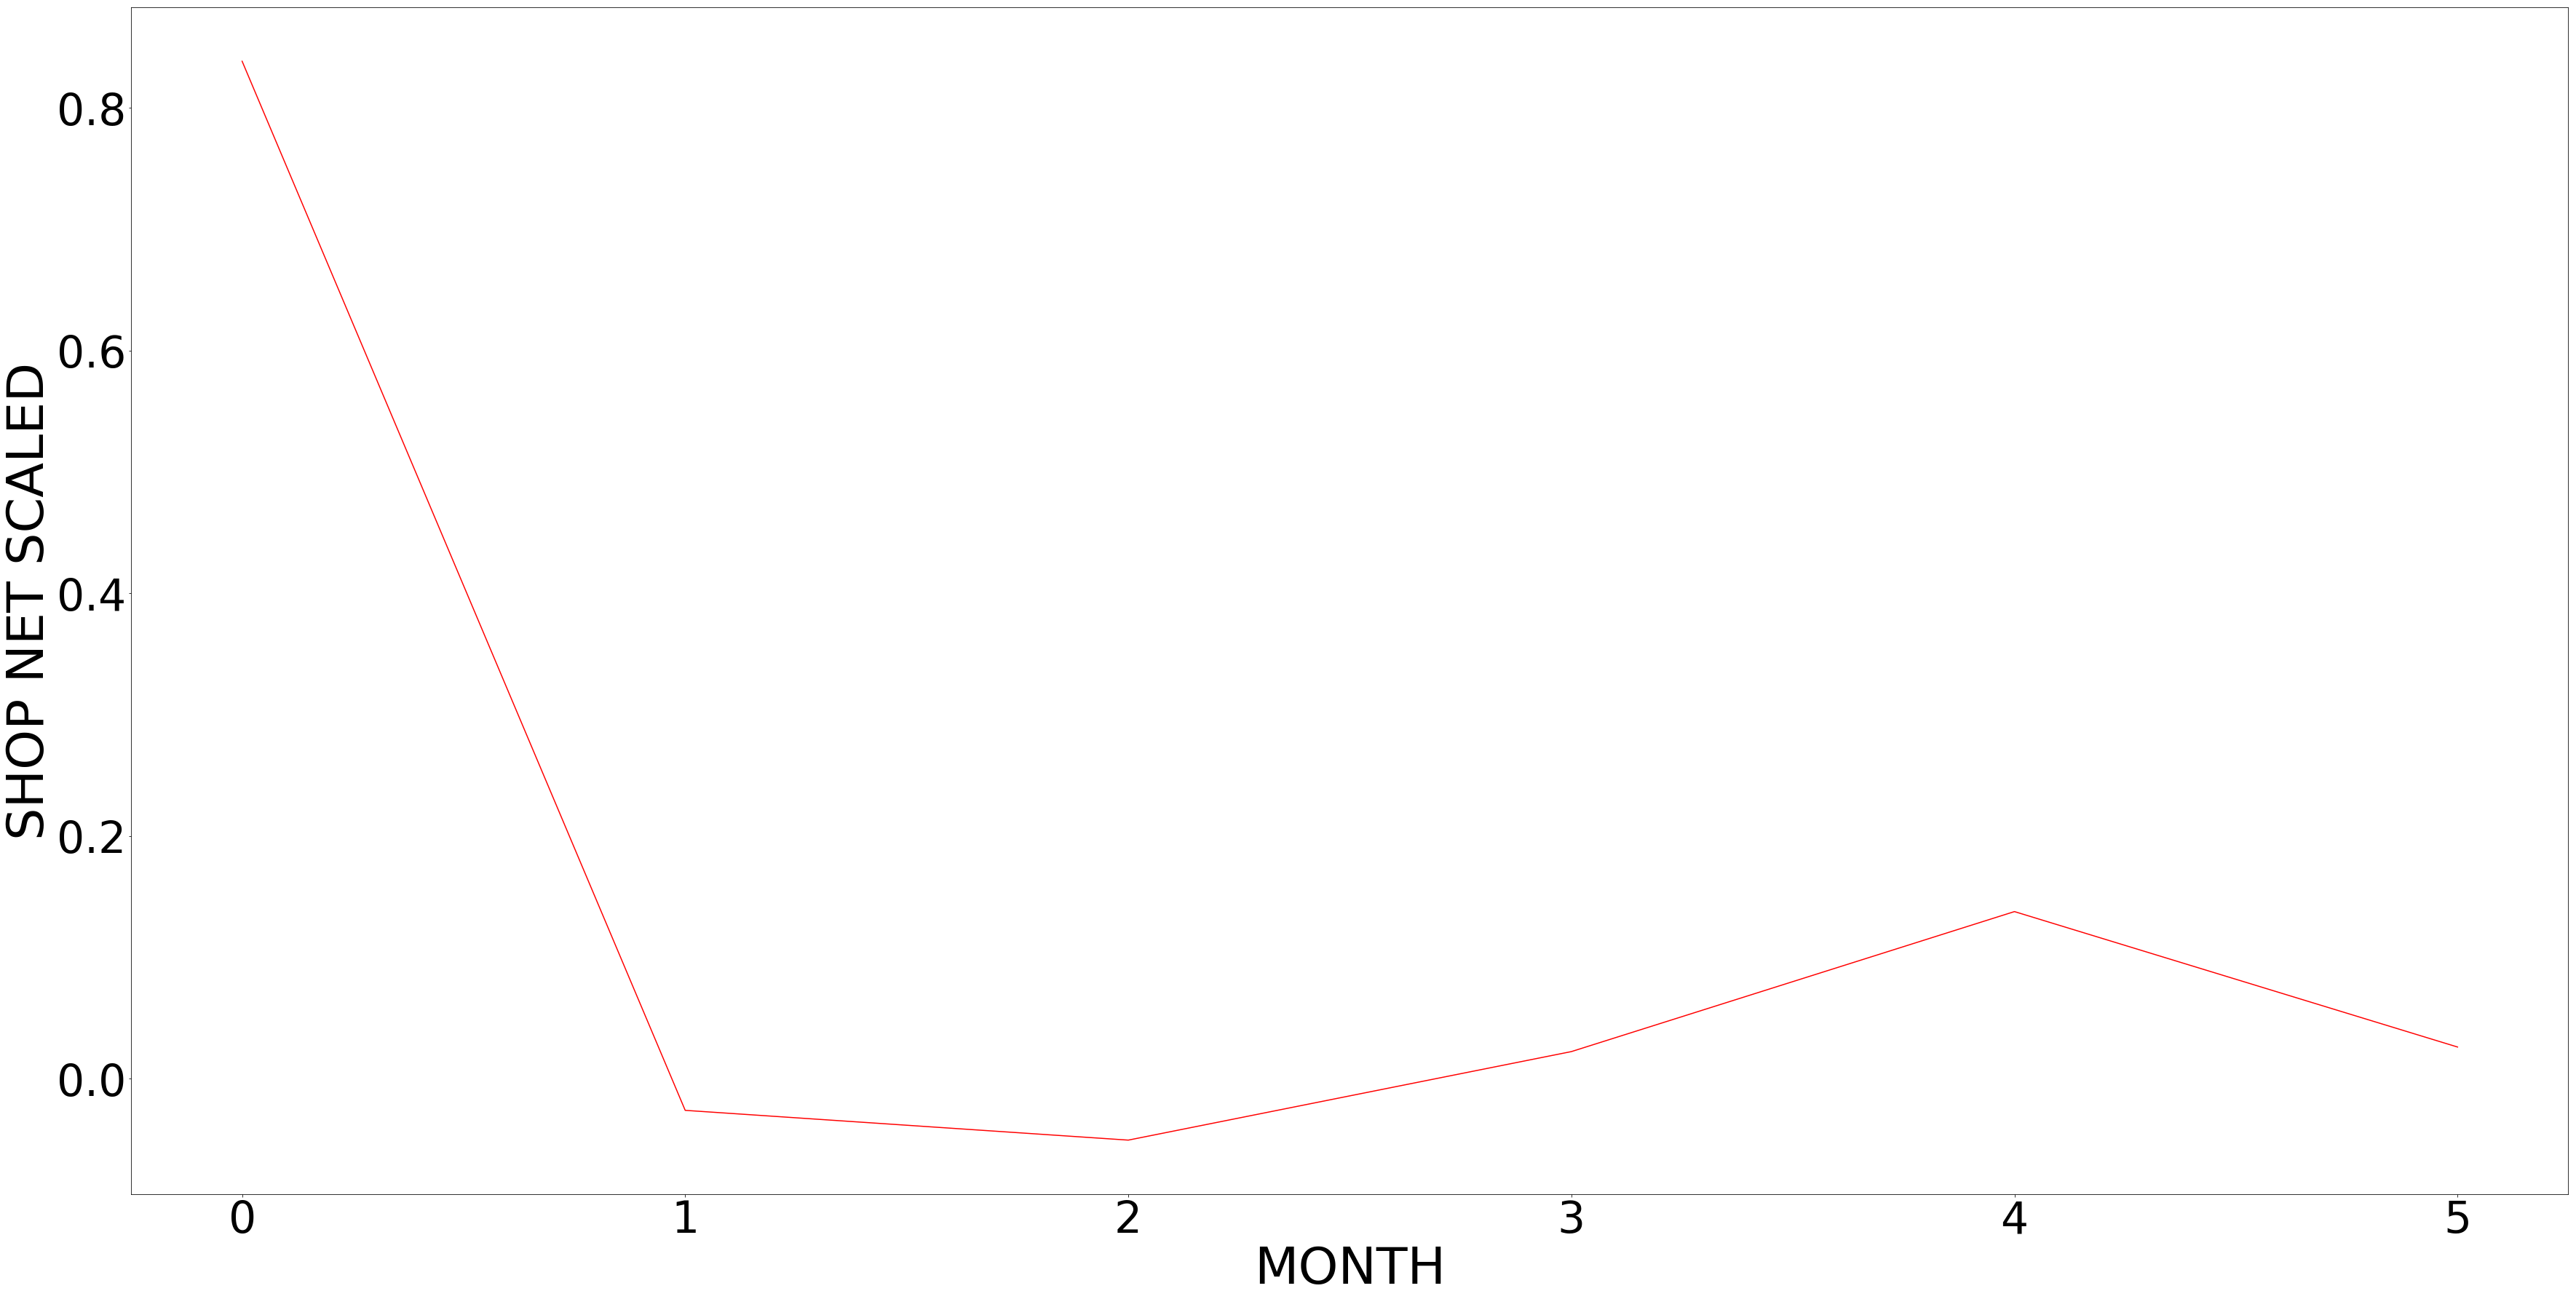

In [235]:
for SAMPLE in df3.index:
    outgoing_amt_net_norm = []
    outgoing_amt_net_norm.append(df3.loc[[SAMPLE]].iloc[:, 0].values[0])
    outgoing_amt_net_norm.append(df3.loc[[SAMPLE]].iloc[:, 1].values[0])
    outgoing_amt_net_norm.append(df3.loc[[SAMPLE]].iloc[:, 2].values[0])
    outgoing_amt_net_norm.append(df3.loc[[SAMPLE]].iloc[:, 3].values[0])
    outgoing_amt_net_norm.append(df3.loc[[SAMPLE]].iloc[:, 4].values[0])
    outgoing_amt_net_norm.append(df3.loc[[SAMPLE]].iloc[:, 5].values[0])
    #plt.scatter(x, outgoing_amt_net_norm)
    plt.plot(x, outgoing_amt_net_norm, c=df3.loc[[SAMPLE]].iloc[:, 6].values[0], alpha=1)
    plt.tick_params(labelsize=60)
    plt.xlabel("MONTH", size=70)
    plt.ylabel("SHOP NET SCALED", size=70)

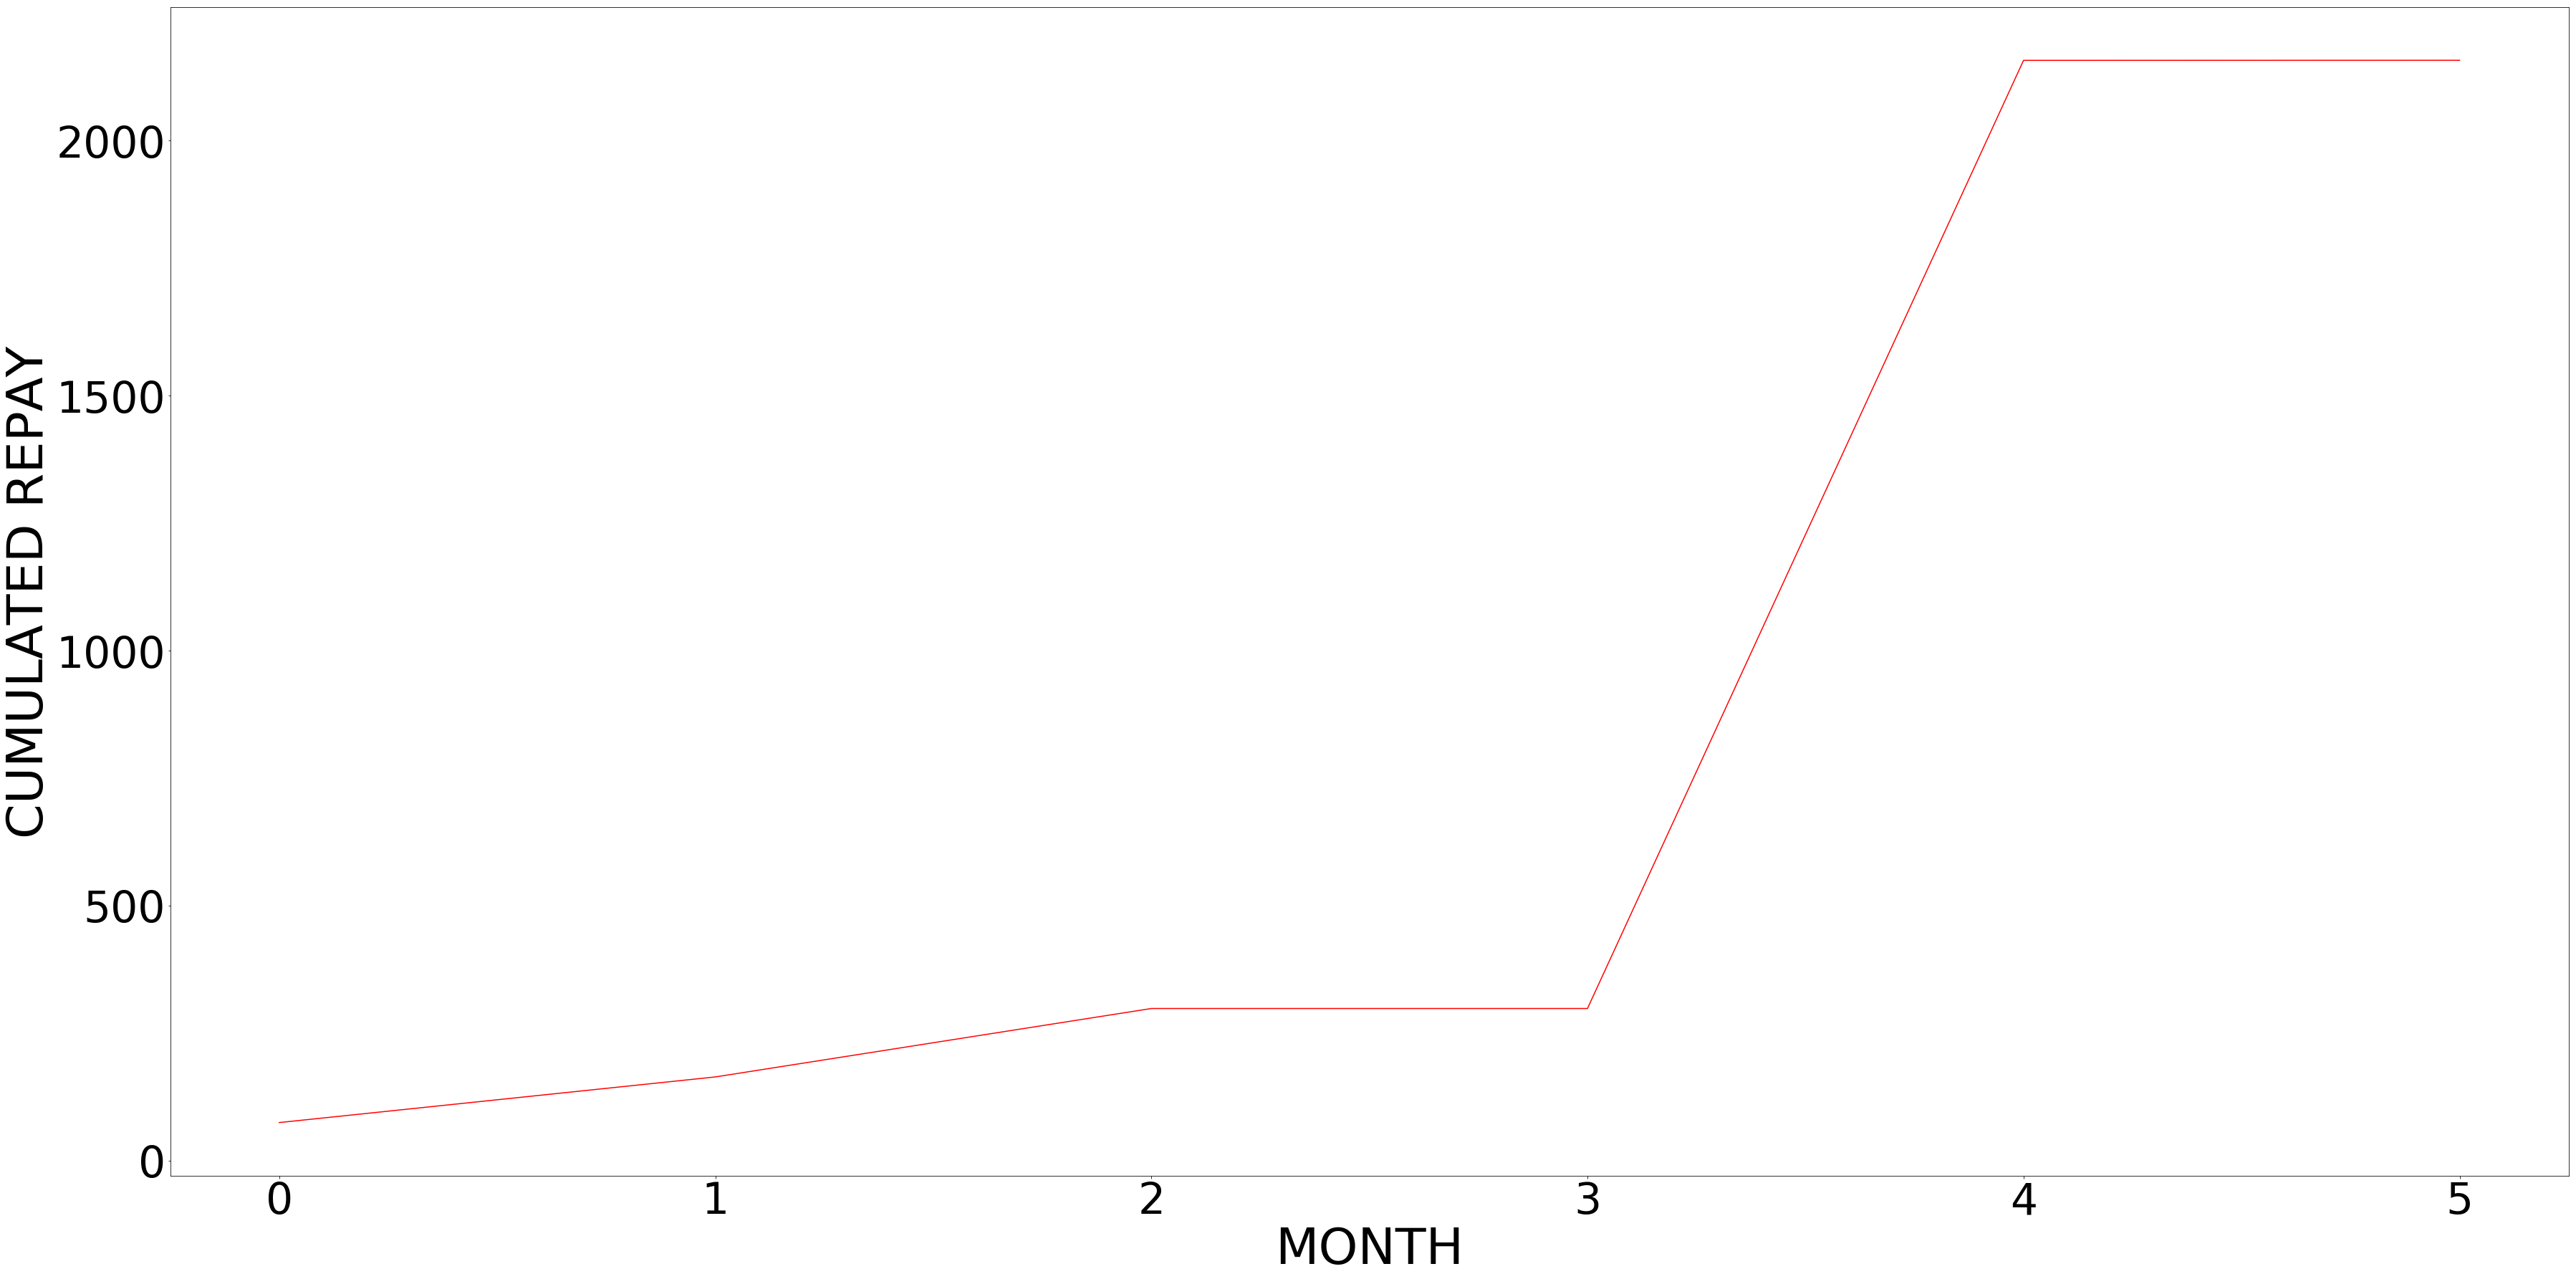

In [237]:
for SAMPLE in df4.index:
    values = []
    values.append(df4.loc[[SAMPLE]].iloc[:, 0].values[0])
    values.append(df4.loc[[SAMPLE]].iloc[:, 1].values[0])
    values.append(df4.loc[[SAMPLE]].iloc[:, 2].values[0])
    values.append(df4.loc[[SAMPLE]].iloc[:, 3].values[0])
    values.append(df4.loc[[SAMPLE]].iloc[:, 4].values[0])
    values.append(df4.loc[[SAMPLE]].iloc[:, 5].values[0])
    #plt.scatter(x, outgoing_amt_net_norm)
    plt.plot(x, values, c=df4.loc[[SAMPLE]].iloc[:, 6].values[0], alpha=1)
    plt.tick_params(labelsize=60)
    plt.xlabel("MONTH", size=70)
    plt.ylabel("CUMULATED REPAY", size=70)

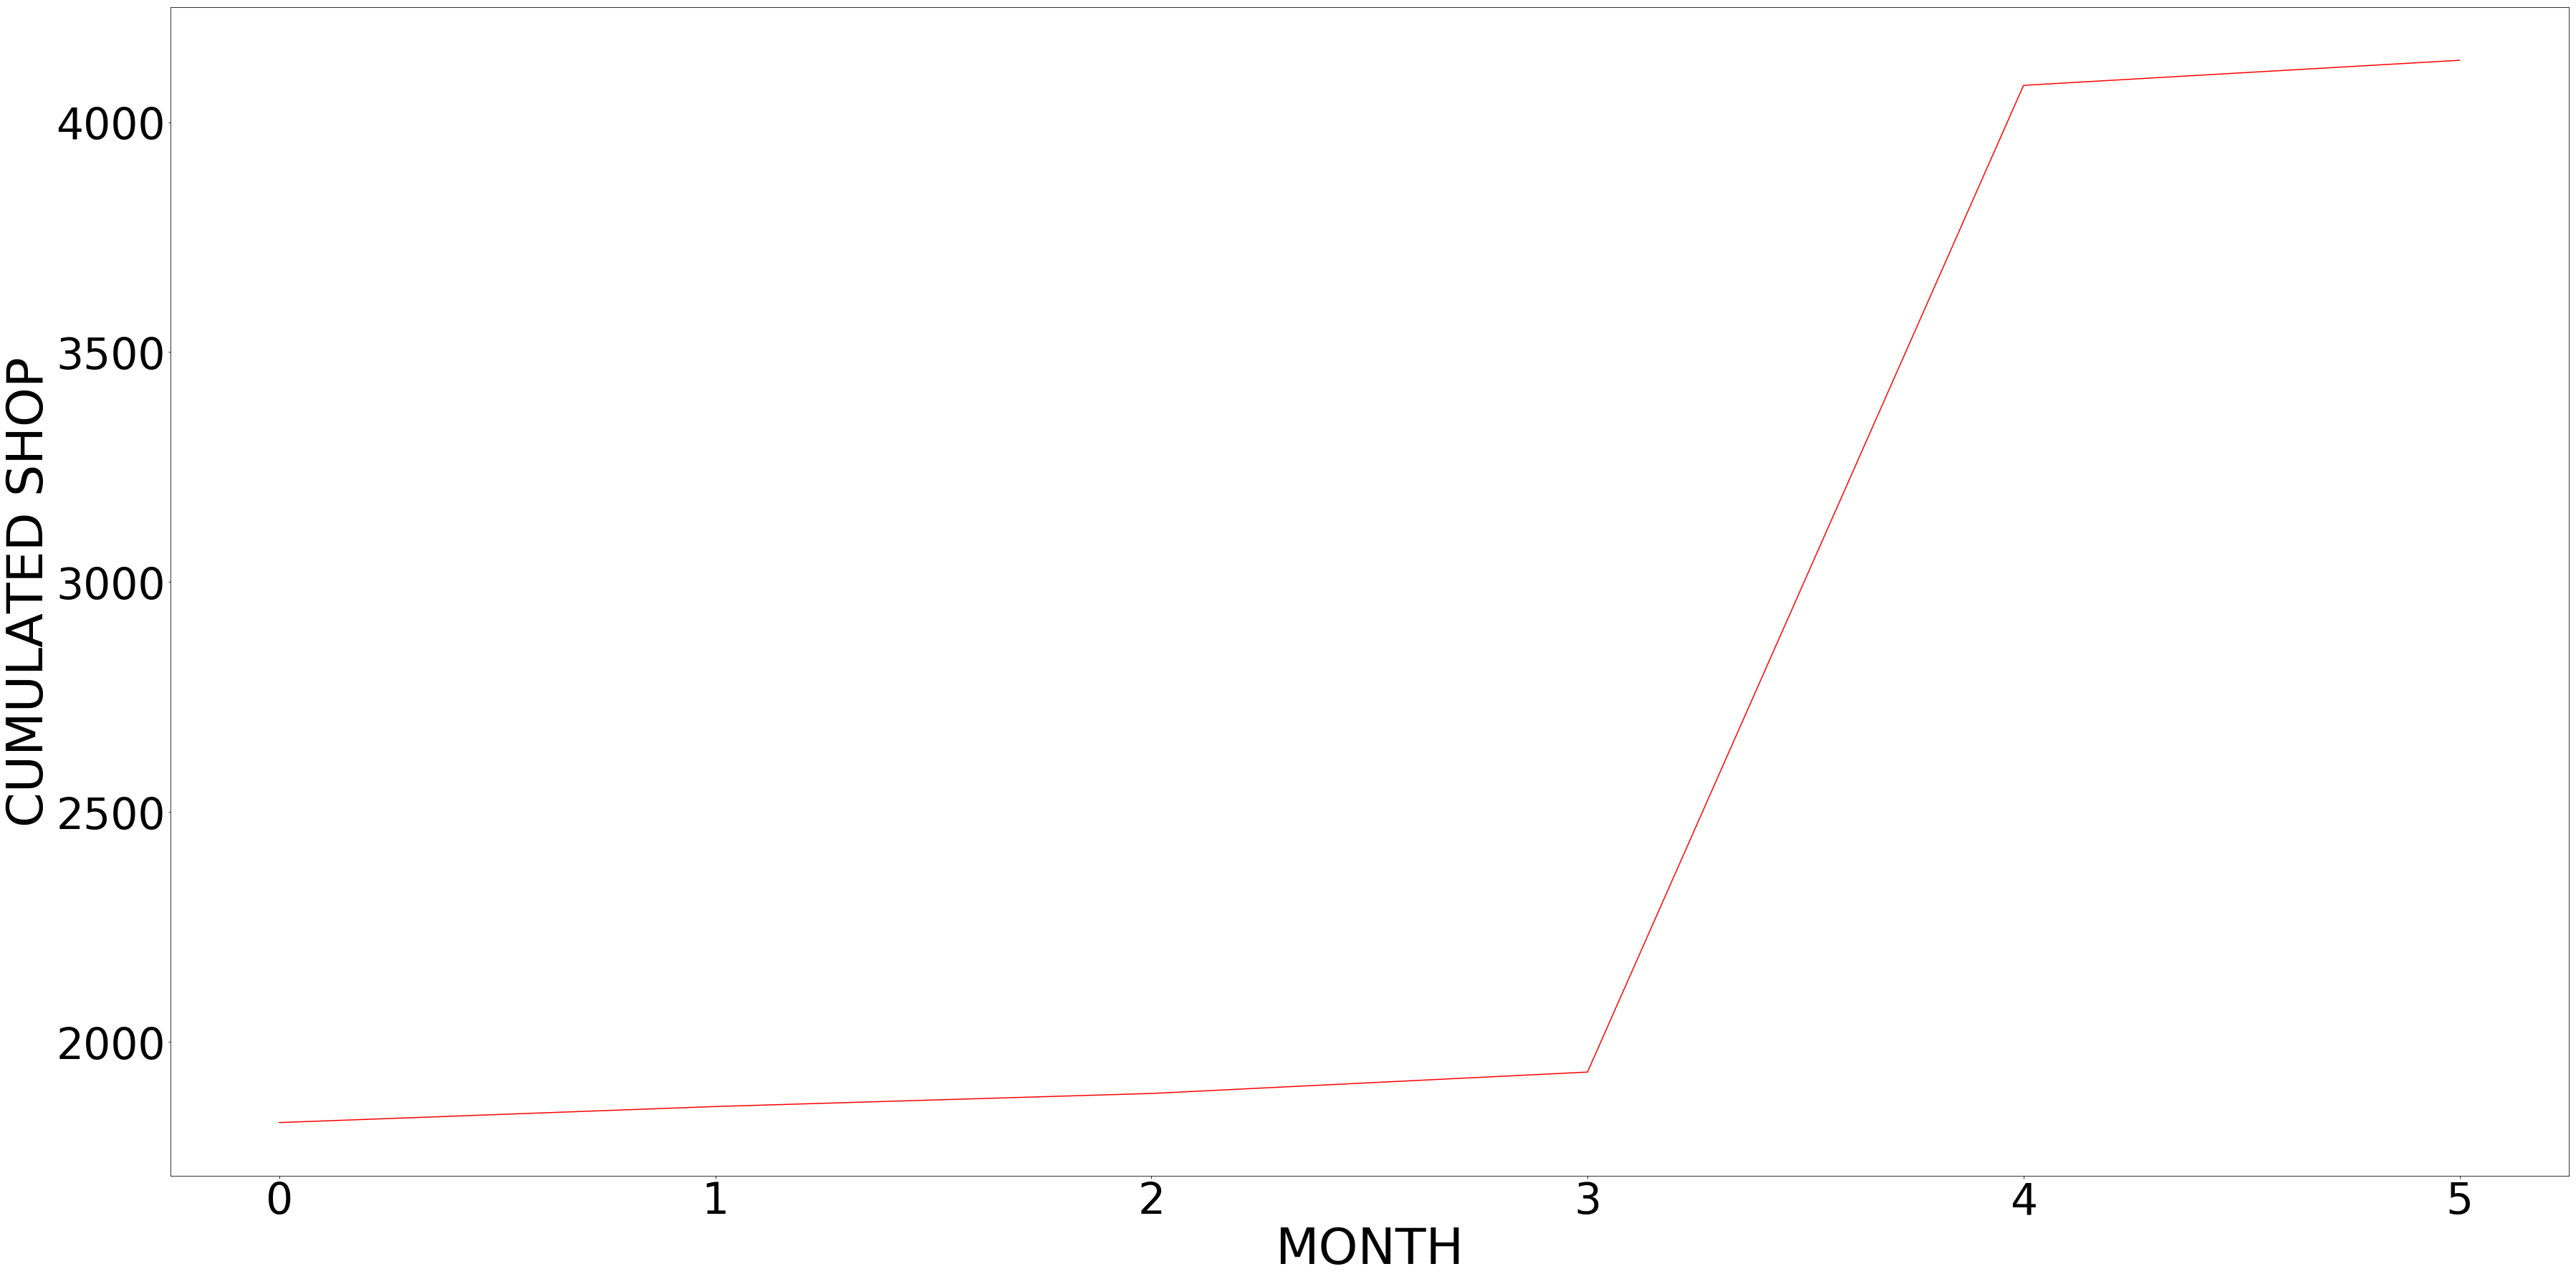

In [238]:
for SAMPLE in df5.index:
    values = []
    values.append(df5.loc[[SAMPLE]].iloc[:, 0].values[0])
    values.append(df5.loc[[SAMPLE]].iloc[:, 1].values[0])
    values.append(df5.loc[[SAMPLE]].iloc[:, 2].values[0])
    values.append(df5.loc[[SAMPLE]].iloc[:, 3].values[0])
    values.append(df5.loc[[SAMPLE]].iloc[:, 4].values[0])
    values.append(df5.loc[[SAMPLE]].iloc[:, 5].values[0])
    #plt.scatter(x, outgoing_amt_net_norm)
    plt.plot(x, values, c=df5.loc[[SAMPLE]].iloc[:, 6].values[0], alpha=1)
    plt.tick_params(labelsize=60)
    plt.xlabel("MONTH", size=70)
    plt.ylabel("CUMULATED SHOP", size=70)

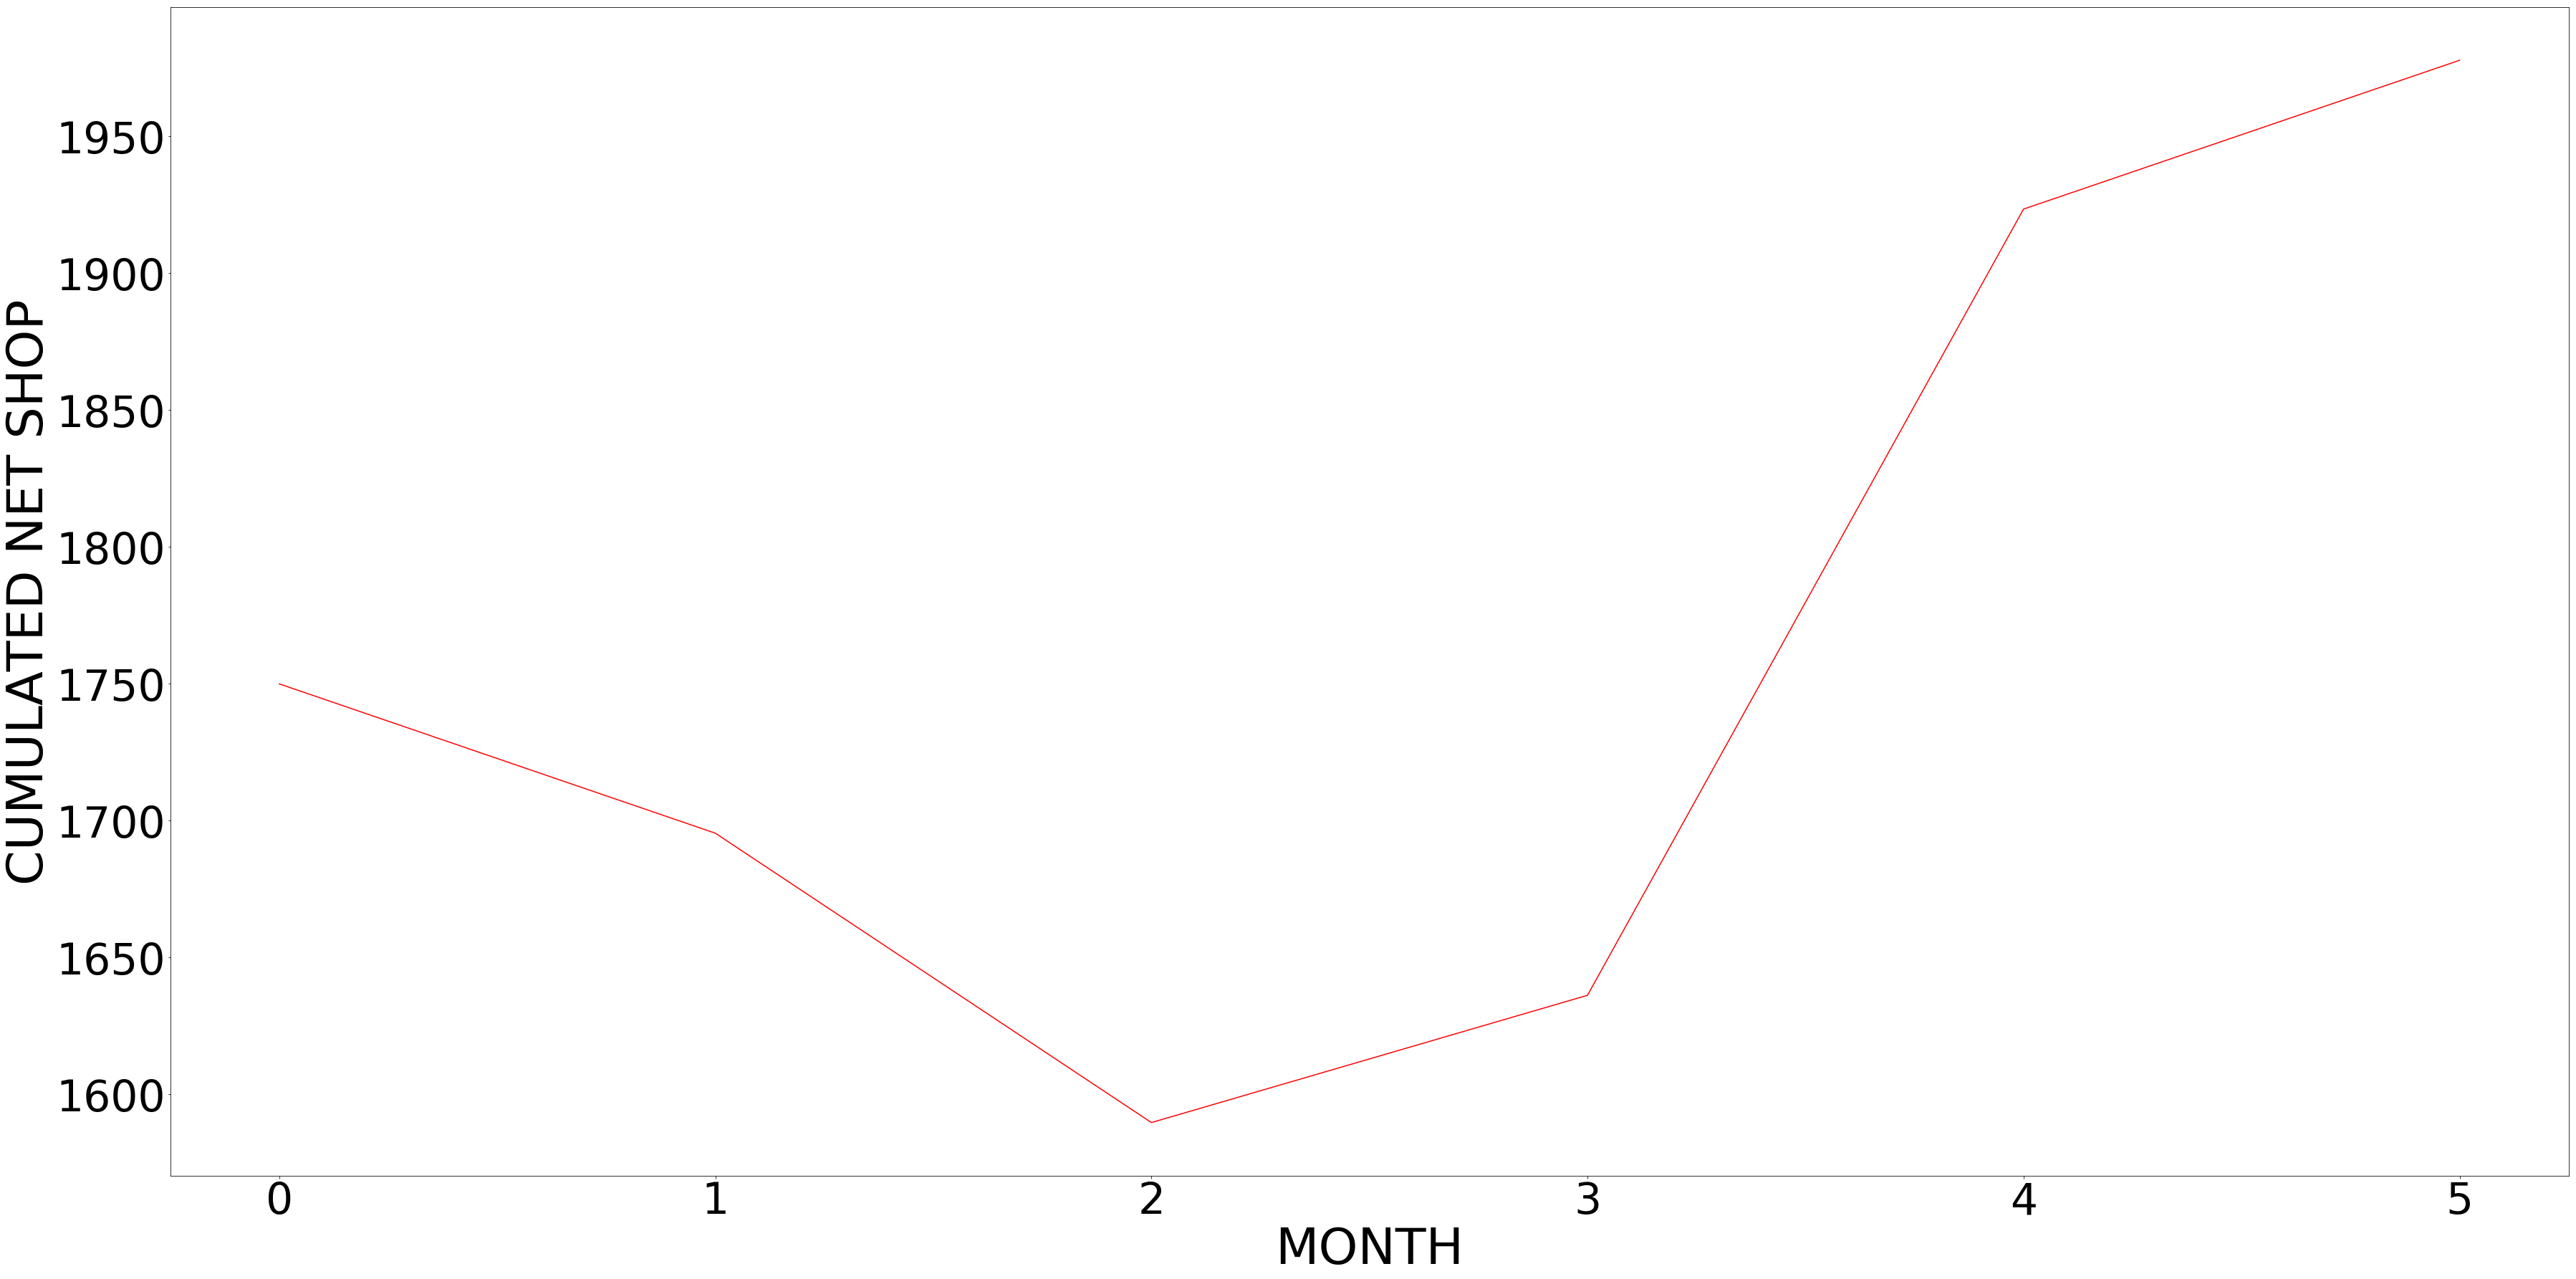

In [239]:
for SAMPLE in df6.index:
    values = []
    values.append(df6.loc[[SAMPLE]].iloc[:, 0].values[0])
    values.append(df6.loc[[SAMPLE]].iloc[:, 1].values[0])
    values.append(df6.loc[[SAMPLE]].iloc[:, 2].values[0])
    values.append(df6.loc[[SAMPLE]].iloc[:, 3].values[0])
    values.append(df6.loc[[SAMPLE]].iloc[:, 4].values[0])
    values.append(df6.loc[[SAMPLE]].iloc[:, 5].values[0])
    #plt.scatter(x, outgoing_amt_net_norm)
    plt.plot(x, values, c=df6.loc[[SAMPLE]].iloc[:, 6].values[0], alpha=1)
    plt.tick_params(labelsize=60)
    plt.xlabel("MONTH", size=70)
    plt.ylabel("CUMULATED NET SHOP", size=70)